In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Aprendizaje supervisado

- Los valores a predecir ya están.
- Utiliza funciones para predecir el valor de una variable objeto.

Existe dos tipos de aprendizaje supervisado:

1. Clasificación.- Predice la etiqueta o categoría de una observación binaria. Por ejemplo podemos predecir si una transacción bancaria es fraudulenta o no (Clasificación binaria).
2. Regresión.- Se utiliza para predecir valores continuos. Por jemplo, predice el precio de propiedad dado la característica (variable predictiva o variable independiente) el número de dormitorios y el tamaño de una propiedad. Lo que llamamos variable objeto hace referencia a variable dependiente o variable respuesta.

CONDICIONES:

1. Los datos no deben tener valores faltantes.
2. Deben ser numéricos.
3. Se almacenan como DataFrames, series o matrices NumPy.

A PRIORI SE NECESITA UN ANÁLISIS EXPLORATORIO DE DATOS PARA GARANTIZAR QUE LOS DATOS ESTÉN EN EL FORMATO CORRECTO.

scikit-learn sigue la misma sintaxis para todo los modelos de aprendizaje supervisado, lo que hace que el flujo de trabajo sea repetible.

In [12]:
# Importar libraria scikit-learn
#from sklearn.module import Model

# Creamos una instancia del modelo
#model = Model()

# Ajustamos el modelo X, a una matriz de nuestras características y a "y" una matriz de nuestros valores de variable objetivo
#model.fit(X,y)

# Utilizamos el método de predicción de puntos del modelo y pasamos otras nuevas observaciones.
#predictions = model.predict(X_new)

## Clasificación
El aprendizaje supervisado utiliza etiquetas. Analicemos cómo podemos construir un modelo de clasificación, o clasificador, para predecir las etiquetas de datos.

### Clasificación de etiquetas de datos
Hay cuatro pasos. Primero, construimos un clasificador, que aprende de los datos etiquetados que le pasamos. Luego le pasamos datos sin etiquetar como entrada y hacemos que prediga etiquetas para estos datos "invisibles". A medida que el clasificador aprende de los datos etiquetados, los llamamos datos de entrenamiento.

### k-vecinos más cercanos
Usaremos un algoritmo llamado k-Vecinos más cercanos, que es popular para problemas de clasificación. La idea de k-Vecinos más cercanos, o `KNN`, es predecir la etiqueta de cualquier punto de datos mirando los `k`, por ejemplo, tres puntos de datos etiquetados más cercanos y hacer que voten sobre qué etiqueta debería tener la observación sin etiqueta. `KNN` utiliza la votación por mayoría, que hace predicciones basadas en la etiqueta que tiene la mayoría de los vecinos más cercanos.

Si `k` es igual a tres, lo clasificaríamos como rojo. Esto se debe a que dos de las tres observaciones más cercanas están en rojo. Si `k` es igual a cinco, lo clasificaríamos como azul.

Para generar intuición sobre KNN, veamos este diagrama de dispersión que muestra el cargo total por la noche versus el cargo total por el día para los clientes de una empresa de telecomunicaciones. Las observaciones están coloreadas en azul para los clientes que han abandonado y en rojo para aquellos que no han abandonado.

Aquí hemos visualizado los resultados de un algoritmo KNN donde el número de vecinos se establece en 15. KNN crea un límite de decisión para predecir si los clientes abandonarán. Se predice que cualquier cliente en el área con un fondo gris abandonará, y se predice que aquellos en el área con un fondo rojo no abandonarán. Este límite se utilizaría para hacer predicciones sobre datos invisibles.

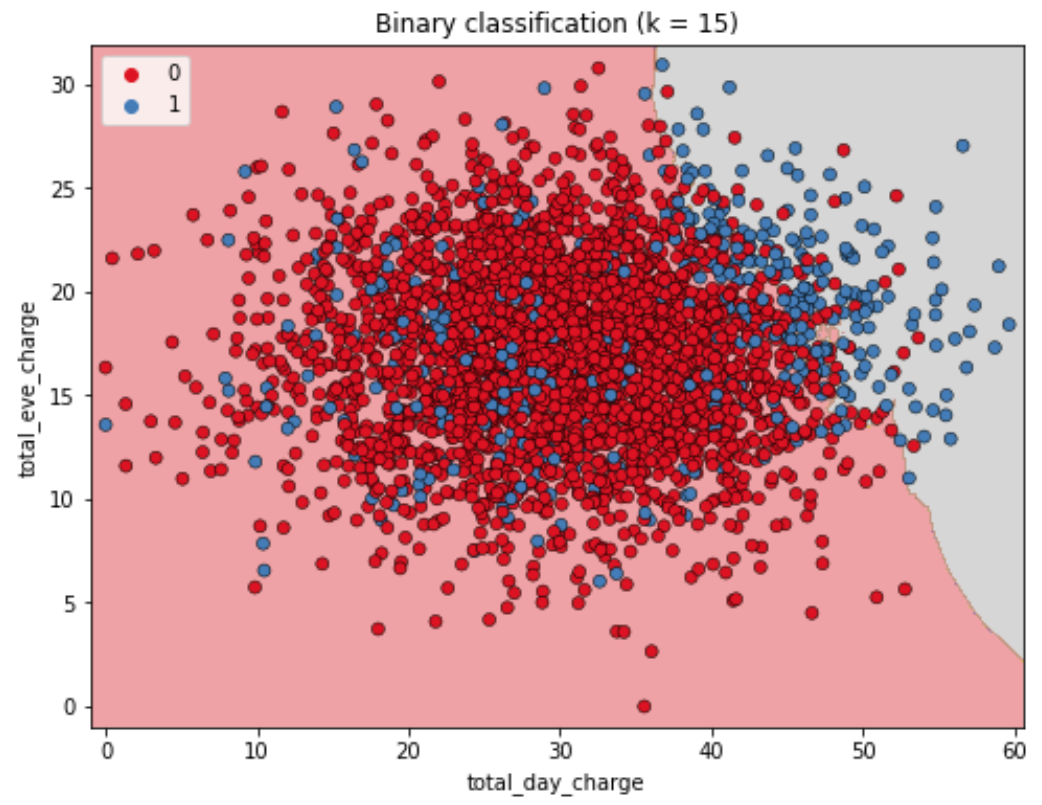

In [3]:
Image(filename="/home/jovyan/notebooks/image/01_KNN.png")

Para ajustar un modelo KNN usando scikit-learn, importamos `KNeighborsClassifier` de `sklearn-dot-neighbors`. Dividimos nuestros datos en X, una matriz 2D de nuestras características, e y, una matriz 1D de los valores objetivo (en este caso, el estado de abandono). scikit-learn requiere que las características estén en una matriz donde cada columna sea una característica y cada fila una observación diferente. De manera similar, el objetivo debe ser una sola columna con la misma cantidad de observaciones que los datos de la característica. Usamos el atributo de valores de puntos para convertir X e y en matrices NumPy. Al imprimir la forma de X e y, vemos que hay 3333 observaciones de dos características y 3333 observaciones de la variable objetivo. Luego creamos una instancia de nuestro KNeighborsClassifier, estableciendo n_neighbors igual a 15 y lo asignamos a la variable knn. Luego podemos ajustar este clasificador a nuestros datos etiquetados aplicando el método de ajuste de puntos del clasificador y pasando dos argumentos: los valores de las características, X, y los valores objetivo, y.

10. Predecir sobre datos sin etiquetar
03:26 - 04:08
Aquí tenemos un conjunto de nuevas observaciones, X_new. Al verificar la forma de X_new, vemos que tiene tres filas y dos columnas, es decir, tres observaciones y dos características. Usamos el método de predicción de puntos del clasificador y le pasamos los datos invisibles como una matriz NumPy 2D que contiene características en columnas y observaciones en filas. La impresión de las predicciones devuelve un valor binario para cada observación o fila en X_new. Predice 1, que corresponde a "abandono", para la primera observación, y 0, que corresponde a "no abandono", para la segunda y tercera observaciones.

In [2]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/telecom_churn_clean.csv'
churn_df = pd.read_csv(ruta_archivo,index_col = 0)
churn_df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


- En esta data, la variable objetivo sería:
    - Churn -> Empleados que se van de la empresa.

**PASOS PARA CONTRUCCIÓN DEL MODELO:**

1. Construir el clasificador que aprende de los datos etiquetados que le pasaremos.
2. Pasar datos sin etiquetar como entrada.
3. Hacer que prediga etiquetas para estos datos invisibles.

A medida que el clasificador aprende de los datos etiquetados, los llamaremos **DATOS DE ENTRENAMIENTO**

### KNN

Empezaremos utilizaremos un algoritmo llamado **K-Vecimos más cercanos (KNN)**.

La idea de este algoritmo es predecir la etiqueta de cualquier punto de datos "k"; por ejemplo, 3 datos etiquetados más cercanos. Utiliza la votación por mayoria, que hace predicciones basadas en la etiqueta que tiene la mayoria de los vecinos más cercanos.

In [6]:
# Dividir los datos en X e y. Convertir con .values a Array
X = churn_df[["total_day_charge","total_eve_charge"]].values
y = churn_df["churn"].values

# Imprimir las observaciones de dos características de 3333 observaciones
print(X.shape,y.shape)

# Crear una instancia de nKNeighborsClassifier, con neighbors 15.
knn = KNeighborsClassifier(n_neighbors = 15)

# Ajustar el clasificador a los datos etiquetados aplicando la función 
# de clasificador
knn.fit(X,y)

# Nuevas observaciones
X_new = np.array([
    [56.8,17.5],
    [24.4,24.1],
    [50.1,10.9]
])
# Imprimir
print(X_new.shape)

# Usar el método de predicción de puntos del clasificador usando 
# datos invisibles
predictions = knn.predict(X_new)

# 1. Se va, 0. se queda.
print('Predicción: {}'.format(predictions))

(3333, 2) (3333,)
(3, 2)
Predicción: [1 0 0]


La impresión de las predicciones devuelve un valor binario para cada observación o fila en X_new

#### Medición del rendimiento del modelo

- En clasificación, la **precisión** (knn.score) es una métrica de uso común.
$$Precisión = \dfrac{Predicciones \; correctas}{Total \; observaciones}$$

Dado que estos datos se utilizaron para entrenar el modelo, el rendimiento no será el indicado, para otros "datos invisibles". Por lo tanto, es común dividir los datos en: 
- Conjunto de entrenamiento y
- Conjunto de prueba.

Donde: 

1. Ajustamos el clasificador usando el conjunto de entrenamiento.
2. ***Calculamos la precisión del modelo comparándola con las etiquetas del conjunto de prueba.***

In [7]:
# Llamar train_test_split pasando nuestras características y objetivos (array)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                   random_state = 21,
                                                   stratify = y)
# Es buena práctica garantizar que nuestra división refleje la proporción de etiquetas en nuestros datos
# Entonces, si la deserción ocurre en el 10% de las observaciones, queremos que el 10% de las etiquetas
# en nuestro conjunto de entrenamiento y prueba represente la deserción, (strarify = y)


# Crear una instancia de un modelo KNN y lo ajustamos a los datos de entrenamiento utilziando el método de ajsute de puntos
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

# Comprobar la precisión con el método de puntuación de puntos.
print(knn.score(X_test,y_test))

0.872


**Interpretación:** La precisión de nuestros modelo es 87%, lo cual es bajo dado que nuetras etiquetas tiene una proporción de 9 a 1.

#### Interpretación de k

A medida que `"k"` aumenta, el límite de decisión es menos afectado por observaciones individuales, lo que refleja un modelo más simple.

1. Estos modelos simples con mayor `"k"` son menos capaces de detectar relaciones en el conjunto de datos, lo que se conoce como **desajuste**.
2. Contrariamente los modelos, con valores pequeños de "k", pueden ser sensibles al ruido en los datos de entrenamiento en lugar de reflejar tendencias generales. Esto se conoce como **Sobreajuste**.

Podemos también interpretar `"k"` usando una **curva de complejidad del modelo**. Donde podemos calcular la precisión del entrenamiento.

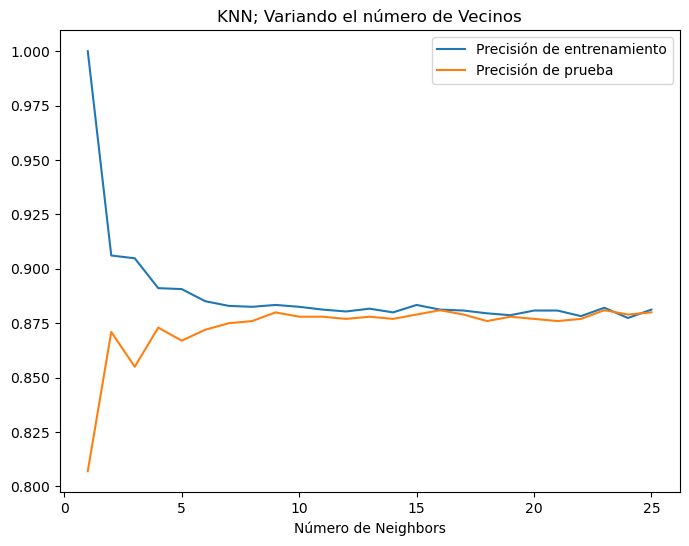

In [8]:
# Crear diccionarios vacíos para almacenar las precisiones de nuestro
# entrenamiento y prueba, y una matriz que contiene un rango de valores "k".
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

# Usar un bucle for para repetir nuestro flujo de trabajo anterior, construyendo 
# varios modelos usando un número diferente de vecinos.
for neighbor in neighbors:
    knn =  KNeighborsClassifier(n_neighbors = neighbor)
    # Entrenar el modelo
    knn.fit(X_train, y_train)
    # Calcular la precisión del conjunto de entrenamiento y prueba.
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Graficar
plt.figure(figsize = (8,6))
plt.title('KNN; Variando el número de Vecinos')
plt.plot(neighbors, train_accuracies.values(), label = "Precisión de entrenamiento")
plt.plot(neighbors, test_accuracies.values(), label = "Precisión de prueba")
plt.legend()
plt.xlabel("Número de Neighbors")
plt.show()

A medida de k aumenta más alla de 7, vemos un sobreajuste en datos de entrenamiento y de prueba, donde el rendimiento 

**NOTA:** Para poder tener mejor precisión, dado que se pueden tener escalas diferentes, podemos utilizar la fórmula de Normalización Min-Max:
$$z_i=\dfrac{x_1-\min(x)}{\max(x)-\min(x)}$$
Siempre que no haya valores extremos.

### Ajuste del modelo

Consideremos un modelo para predecir si una transacción bancaria es fraudulento, donde sólo el $1\%$ de las transacciones son realmente fraudulentas.

 Podríamos construir un modelo que clasifique cada transacción como legítima, lo cual tendría una precisión del 99%.

 Sin embargo, haría un terrible trabajo al predecir el fraude. Las situación en la que una clase es más frecuente se llama **desequilibrio de clases**. Aquí, la clase de transacciones legítimas contiene muchas más instancias que la clase de transacciones fraudulentas. Este es una situación común en la práctica y requiere un enfoque diferente para evaluar el desempeño del modelo.

 Para resolver este problema, podemos crear una matriz $2 \times 2$ que resuma el desempeño, el cual llamaremos **Matriz de confusión**.
$$
\begin{array}{c|cc}
    & \tiny\text{Predicción legítima} & \tiny\text{Predicción Fraudulenta}\\
    \hline
    \tiny\text{Actual: legítima} &\tiny\text{verdadero negativo} & \tiny\text{Falso positivo}\\
   \tiny \text{Actual: Fraudulenta} & \tiny\text{Falso negativo} & \tiny\text{Verdadero positivo}
\end{array}
$$

- **Los verdaderos positivos.** Son la cantidad de transacciones fraudulentas correctamente etiquetadas.
- **Los verdaderos negativos.** Son el número de transacciones legítimas correctamente etiquetas.
- **Los falsos negativos.** Son el número de transacciones legítimas incorrectamente etiquetadas.
- **Los falsos positivos.** Son la cantidad de transacciones incorrectamente etiquetas como fraudulentas.

Generalmente la clases de interés se denomina **Clase positiva**. Como nuestro objetivo es detectar fraude, la clases positiva es una transacción ilegítima.

La **matríz de confusión** nos permite **recuperar la precisión**, dado por:
$$\dfrac{t_p+t_n}{t_p+t_n+f_p+f_n}$$
La suma de las predicciones verdaderas dividida por la suma total de la matriz.

Existen otras métricas importantes que podemos calcular a partir de la matriz de confusión:

1. **La precisión o valor predictivo positivo:** Que es el número de verdaderos positivos dividido por la suma de todas las predicciones positivas.
$$\dfrac{\text{verdaderos positivos}}{\text{verdaderos positivos} + \text{falsos positivos}}$$
En nuestro caso, es el número de fruades correctamente etiquetadas dividida por el número total de transacciones clasificadas como fraudulentas. Una alta precisión significa tener una tasa más baja de falsos positivos. Para nuestro clasificador, esto se traduce en que menos transacciones legítimas se clasifiquen como fraudulentas.

2. **Recall o sensibilidad:** Es el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos negativos.
$$\dfrac{\text{verdaderos positivos}}{\text{Vedaderos positivos}+\text{Falsos negativos}}$$
Un alto recuerdo refleja una tasa más baja de falsos negativos. Para nuestro clasificador, significa predecir correctamente la mayoria de las transacciones fraudulentas.

3. **La puntación F1-score:**  Es la *media armónica de precisión y recuperación* dado por:
$$2\cdot \dfrac{precisión\cdot recall}{precisión + recall}$$

Esta métrica da igual peso a la precisión y a la recuperación, por lo que tiene en cuenta tanto el número de errores cometidos por el modelo como el tipo de errores.

La puntuación F1-score favorece modelos con precisión y recuperacion similares y es una herramienta útil si buscamos un modelo que funcione razonablemente bien en ambas métricas.

In [9]:
# Dividir los datos en X e y.
X = churn_df.drop("churn", axis = 1).values
y = churn_df["churn"].values

# Crear una instancia del clasificador. 
knn = KNeighborsClassifier(n_neighbors = 7)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.4,
                                                   random_state = 43)

# Ajustar los datos de entreamiento
knn.fit(X_train,y_train)

# Predecir las etiquetas del conjunto de prueba 
y_pred = knn.predict(X_test)

# Imprimir la matriz de confusión
print(confusion_matrix(y_test,y_pred))

# Generar de las métricas relevantes
print(classification_report(y_test,y_pred))

[[1134   16]
 [ 146   38]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1150
           1       0.70      0.21      0.32       184

    accuracy                           0.88      1334
   macro avg       0.79      0.60      0.63      1334
weighted avg       0.86      0.88      0.85      1334



En nuestro caso:

- **Verdaderos positivos:** Cantidad de empleados que se van de la empresa correctamente etiquetados.
- **Verdaderos negativos:** Cantidad de empleados que se quedan en la empresa correctamente etiquetados.
- **Falsos negativos:** Cantidad de empleados que se quedan en la empresa incorrectamente etiquetados.
- **Falsos positivos:** Cantidad de empleados que se van de la empresa incorrectamente etiquetados.

**MATRIZ DE CONFUSIÓN**

1. **Accuracy:** De todas las predicciones que hice, cuantas son correctas. (No funciona si existe un desbalance).
2. **Recall:** De toda la cantidad de empleados que etiquetamos correctamente, cuantos hemos identificado correctamente.
3. **F1:** Que tan bien el modelo equilibra la precisión y el recall. Esta en el rango de [0,1], donde 1 significa que tiene alta *accuracy* en función de falsos positivos, como un alto recall.

**INTERPRETACIÓN**

- **Clase 0 (empleados que se quedan)**:
    - **Precisión**: El modelo tiene una precisión del 89%, lo que significa que del total de empleados que el modelo predijo que se quedarían, el 89% realmente se quedó.
    - **Recall**: El modelo tiene un recall del 99%, lo que significa que pudo identificar correctamente el 99% de los empleados que realmente se quedaron.
    - **F1-score**: El F1-score es una medida que combina precisión y recall en un solo número. Un F1-score del 93% indica que el modelo tiene un buen equilibrio entre precisión y recall para la clase de empleados que se quedan.
    - **Support**: El support es el número de ocurrencias reales de la clase en el conjunto de datos. En este caso, hay 1150 empleados que se quedaron.

- **Clase 1 (empleados que se van)**:
    - **Precisión**: El modelo tiene una precisión del 70%, lo que significa que del total de empleados que el modelo predijo que se irían, el 70% realmente se fue.
    - **Recall**: El modelo tiene un recall del 21%, lo que significa que pudo identificar correctamente solo el 21% de los empleados que realmente se fueron.
    - **F1-score**: Un F1-score del 32% indica que el modelo tiene un equilibrio relativamente bajo entre precisión y recall para la clase de empleados que se van.
    - **Support**: Hay 184 empleados que realmente se fueron.

- **Accuracy**: La precisión total del modelo es del 88%, lo que significa que el modelo predijo correctamente el 88% de los casos, tanto de empleados que se quedaron como de empleados que se fueron.

- **Macro avg**: El promedio macro de precisión, recall y F1-score no tiene en cuenta el desequilibrio de clases y trata todas las clases por igual. La precisión macro avg es del 79%, el recall macro avg es del 60% y el F1-score macro avg es del 63%.

- **Weighted avg**: El promedio ponderado de precisión, recall y F1-score tiene en cuenta el desequilibrio de clases y da más peso a la clase con más instancias (en este caso, los empleados que se quedan). La precisión ponderada avg es del 86%, el recall ponderado avg es del 88% y el F1-score ponderado avg es del 85%.
  
### Regresión logística y la curva de ROC

- La regresión logística se utiliza para ***clasificación***.
- Este modelo calcula la  probabilidad $p$, de que una observación pertenezca a una clases binaria.
- Usando este los datos de diabetes:
    - Si $p\geq 0.5$, etiquetamos los datos cómo $1$. Qué hace referencia a que una persona tiene más probabilidades de tener diabetes.
    - Si $p<0.5$, lo etiqutamos cómo $0$ para represetar que es más probable que no tenga diabetes.
 
***El MODELO DE REGRESIÓN LOGÍSTICA produce un límite de decisión lineal.***

In [11]:
# Instanciar el modelo
logreg = LogisticRegression(max_iter = 2300)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 42)

# Ajustar el modelo a los datos de entrenamiento
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2300)

#### Predecir las probabilidad

- Predecimos las probabilidades de que cada instancia pertenezca a una clase (grupo).
- Esto devuelve una matriz bidimensional con probabilidades de ambas clases.
- En nuestro caso que si el individuo no abandonó o si abandonó.

In [12]:
# Predecir probabilidades
## # Dividir la segunda columna, que representa las probabilidades
## de clases positiva.
y_pred_probs = logreg.predict_proba(X_test)[:,1]


# Imprimir la probabilidad de que la primera observación haya cambiado
print(y_pred_probs[0])

0.21745212361495941


### Curva ROC

- El umbral para predecir la probabilidad es de $0.5$.
- ¿Qué sucede si variamos este umbral?.
- Lo haremos con la Curva de ROC, que visualizará ***como los diferentes umbrales afectan las tasas de verdaderos positivos y falsos positivos***.
    - Si el umbral es igual a $p=0$, (punto superior derecho del gráfico), el modelo predice uno para todos las observaciones, lo que significa que predecirá correctamente todos los valores positivos y predecirá incorrectamente todos los valores negativos.
    - Si el umbral es igual a $p=1$ (punto inferior izquierdo del gráfico), el modelo predice cero para todos los datos, lo que significa que tanto las tasas de verdaderos como de falsos positivos son cero.
- La idea sería hacer variar el umbral.

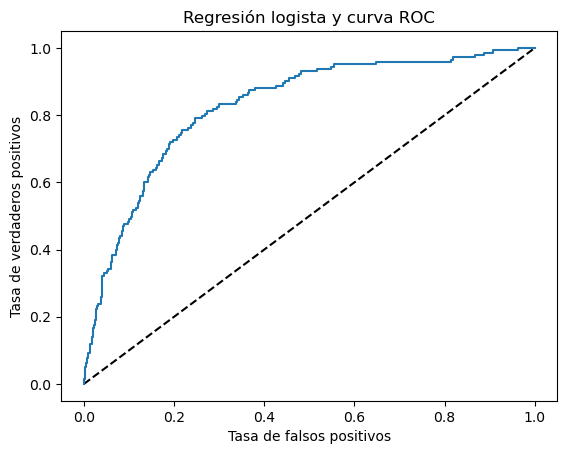

In [13]:
# Llamar a la función roc_curve
## Pasar las etiqueteas de prueba como 1er argumento y las probabiliaddes 
## predichas como 2do.
## Desglozar los resultados como: 
### tasa de falsos positivos (FPR)
### Tasa de verdaderos positivos (TPR)
### Y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Trazar una linea de puntos de cero a uno, junto con FPR y TPR
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Regresión logista y curva ROC')
plt.show()

#### Cuantificar el rendimiento del modelo

- Tener un modelo con uno para la tasa de verdaderos positivos y cero para la tasa de falsos positivos, sería el modelo perfecto.
- Así, que para cuantificar el rendimiento del modelo, ***calculamos el área bajo la curva de ROC***, una métrica conocida como **AUC**.
    - Las puntuaciones varían de cero a uno, siendo uno ideal.

In [14]:
# Aplicar la métrica de AUC
print(roc_auc_score(y_test, y_pred_probs))

0.827630945483921


El AUC, o Área Bajo la Curva, es una métrica que se utiliza para cuantificar el rendimiento general de un modelo de clasificación binaria.

El ***AUC se interpreta como la probabilidad de que un clasificador clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio***. Aquí están algunos puntos clave sobre cómo interpretar el AUC:

- Un AUC de 1.0 indica que el modelo tiene una capacidad perfecta para distinguir entre las clases positiva y negativa. Es decir, el modelo clasificará correctamente un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio el 100% de las veces.

- Un AUC de 0.5 indica que el modelo no tiene capacidad para distinguir entre las clases positiva y negativa. Es decir, el modelo clasificará correctamente un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio solo el 50% de las veces, lo cual es equivalente a adivinar al azar.

- Un AUC menor a 0.5 indica que el modelo está clasificando peor que una clasificación aleatoria. En este caso, podría ser útil invertir las predicciones del modelo.

En resumen, cuanto más cercano esté el AUC a 1, mejor será el modelo para distinguir entre las clases positiva y negativa. Y cuanto más cercano esté a 0.5, menos útil será el modelo.

**Interpretación:** En nuestro conjunto de datos, un valor de AUC de 0.82 indica que tu modelo tiene un buen rendimiento en la clasificación entre empleados que abandonan la empresa y los que se quedan. En términos más específicos, esto significa que si eliges al azar un empleado que dejó la empresa y uno que se quedó, hay una probabilidad del 82% de que tu modelo clasifique correctamente al empleado que dejó la empresa por encima del que se quedó.

Es importante recordar que aunque 0.82 es un buen valor de AUC, la interpretación depende del contexto. Por ejemplo, en algunos campos como la detección de enfermedades, es posible que se requiera un AUC más alto para considerar que el modelo es bueno. Además, siempre es útil comparar el AUC con el de otros modelos para tener una mejor idea de cómo se desempeña tu modelo.

Finalmente, aunque el AUC es una métrica útil, no debes confiar únicamente en ella para evaluar tu modelo. También debes considerar otras métricas y aspectos del modelo, como la precisión, la exhaustividad, la matriz de confusión, la interpretabilidad del modelo y la importancia de las características. Además, es importante validar tu modelo con un conjunto de datos de prueba independiente para asegurarte de que el modelo se generaliza bien a nuevos datos.

-------------------------------------------------------------------

--------------------------------------------------------------------

-------------------------------------------------------------------

--------------------------------------------------------------------

## Regresión

Normalmente se tiene valores continuos. 

Empecemos con datos de salud de las mujeres para predecir los niveles de glucosa en sangre.

**VARIABLES**:

- pregnancies -> número de embarazos
- glucose -> Glucosa
- triceps -> pliegue cutáneo del tríceps
- insulin -> Niveles de insulina
- bmi -> indice de masa corporal
- age -> edad
- diabetes -> Estado de diabetes 1. indica diagnostico, 2. ausencia de diagnostico.

In [8]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/diabetes_clean.csv'
diabetes_df = pd.read_csv(ruta_archivo,index_col = None)
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# Crear característica y valor objetivo
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values

# Corroborar que sean de tipo array
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


- Empecemos a predecir los niveles de glucosa en sangre a partir de una única característica: el índice de masa corporal

In [17]:
# Dividir la columna BMI de X (la cuarta columna)
X_bmi = X[:,4]

# Verificar la forma de X e y
print(y.shape,X_bmi.shape)

# La forma para X_bmi no es correcta debido a que debe ser (768,1).
# Para ello aplicar lo siguente
X_bmi = X_bmi.reshape(-1,1)
print(y.shape,X_bmi.shape)

(768,) (768,)
(768,) (768, 1)


- Grafiquemos los niveles de glucosa en sangre en función del ínidce de masa corporal.

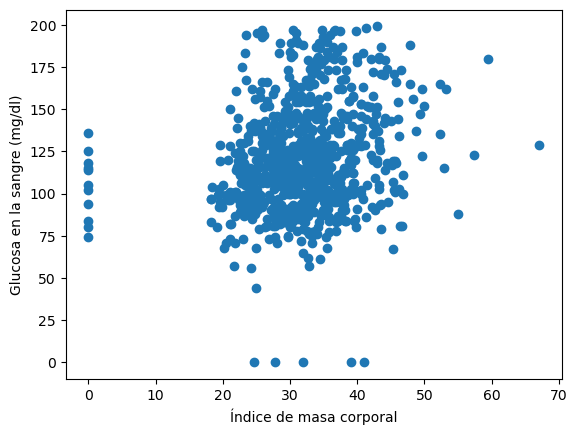

In [18]:
# Graficar
plt.scatter(X_bmi, y)
plt.ylabel("Glucosa en la sangre (mg/dl)")
plt.xlabel("Índice de masa corporal")
plt.show()

- Ahora ajustemos el modelo y tracemos las predicciones

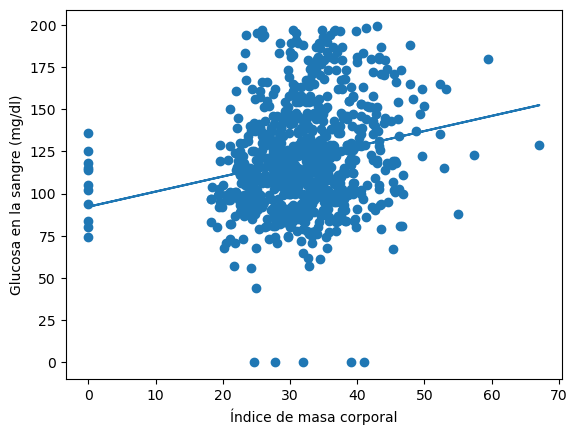

In [19]:
# Crear una instancia del modelo
reg = LinearRegression()

# Ajustar el modelo a todas las observaciones de características
reg.fit(X_bmi, y)

# Crear la variable de predicciones
predictions = reg.predict(X_bmi)

# Graficar
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Glucosa en la sangre (mg/dl)")
plt.xlabel("Índice de masa corporal")
plt.show()

### Conceptos básicos de regresión lineal

Se tiene,

$$y = ax + b$$

Donde, 
$$
\begin{array}{rcl}
    y &=& Objeto\\
    x &=& caracteristica\\
    a &=& Pendiente\\
    b &=& Intersección
\end{array}
$$

- ¿Cómo escogemos $a$ y $b$?
    - Podemos definir una función de error para cualquier linea dada.
    - Luego, podemos elegir la linea que minimice esta función.
 
La función de error se denomina **funciones de pérdida o de costo**

- La distancia entre el punto dado y la linea de regresion se llama **suma de residuos**, los cuales querremos minimizar. Es decir,
$$RSS = \sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$$

Este tipo de regresión lineal se le llama **Minimos cuadrados ordinarios** o **OLS**.

- Cuando se agregan más funciones se le llama regresión lineal múltiple.

Ahora, realizaremos una regresión lineal múltiple con los datos de diabetes:

In [20]:
# Dividir el conjunto de datos en entranamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                   random_state = 42)

# Instanciar el modelo
reg_all = LinearRegression()

# Ajustar el modelo
reg_all.fit(X_train, y_train)

# Predecir el conjunto de prueba
y_pred = reg_all.predict(X_test)

- La métrica predeterminada para evaluar el desempeño del modelo de regresión es $R^2$ que cuantifica la **cantidad de varianza objetivo** que se explica por las características. 1 nos dice que las características explican completamente la variación del objetivo.

- Para calcular $R^2$, llamamos al método de puntación de puntos del modelo:

In [21]:
# Calcular R^2
reg_all.score(X_test, y_test)

0.28280468810375115

- Otra forma de evaluar el desempeño de un modelo de regresión es tomar la **media de la suma residual de cuadrados**:
$$MSE = \dfrac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$$
Llamado **Error cuadrático medio**. El MSE se mide en unidades de nuestra variable objetivo al cuadrado. Por ejemplo, si el modelo predice un valor en dólares, el MSE estará en dólares al cuadrado. Para convertir a dolares:
$$RMSE=\sqrt{MSE}$$
Conocida como **raìz del error cuadrático medio**.
Para calcular el RMSE se tiene:

In [22]:
# Calcular el error cuadrático medio
mean_squared_error(y_test, y_pred, squared = False)

26.341459582232265

**Interpretación:** El modelo tiene un error promedio para los niveles de glucosa en sangre de alrededor de 24 miligramos por decilitro.

### Validación Cruzada

***El $R^2$ depende de la forma en que dividimos los datos por lo que no puede ser representativo para generalizar a datos invisibles***. Para combatir esta dependencia de lo que es esencialmente una división aleatoria, utilizamos una técnica llamada **validación cruzada**.

1. Se empieza dividiendo el conjunto de datos en cinco grupos.
2. Reservemos el primer grupo como conjunto de prueba.
3. Los cuatro restantes predicen los conjuntos de prueba.
4. Calcular nuestra métrica de interes como el $R^2$.
5. Reservamos el segundo grupo como nuestro conjunto de prueba, predecimos con los restantes conjuntos de prueba y calculamos de nuevo nuestro grupo de interes.
6. Así sucesivamente.
7. Cómo resultado adquirimos, por ejemplo cinco $R^2$'s a partir de los cuales podemos calcular estadística descriptivas, como la media, la mediana y lso intervalos de confianza.

Ojo, usar muchos grupos es costo computacionalmente. 

Para realizar una validación cruzada K-fold en scikit-learn:
- Importamos cross_val_score de sklearn-dot-model_selection y KFold que nos permite establecer una semilla y mezclar datos, haciendo que nuestros resultados sean repetibles en sentido decendente.

In [23]:
# Llamar a KFold
## n_splits = 6 pliegues o grupos.
## shuffle = Mezcla los datos antes de dividirlos.
kf = KFold(n_splits = 6, shuffle = True, random_state = 42)

# Instaciar el modelo
reg = LinearRegression()

# Llamar a cross_val_score
cv_results = cross_val_score(reg, X, y, cv = kf)
# La longitud de la matriz es el número de pliegues (grupos) utilizados

# Impromir cv_results
print(cv_results)

# Calcular la media y la desviación estándar de cv_results
print("Media:", np.mean(cv_results),"Deviación estandar:", np.std(cv_results))

# Calcular el interalo de confianza
print('Intervalo de confianza al 95%:', np.quantile(cv_results,[0.025,0.975]))

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
Media: 0.31909697867344794 Deviación estandar: 0.070153206101142
Intervalo de confianza al 95%: [0.24088592 0.41580685]


### Regresión regularizada 

Exploraremos ***la regularización en regresión, una técnica para evitar el sobreajuste.***

Recordemos que ajustar **un modelo de regresión minimiza una pérdida**. Si permitimos que estos ajustes (coeficientes) sean grandes, podemos producir un sobreajuste.

Por lo tanto, es una práctica común alterar la función de pérdida para que penalice los coeficientes grandes, a esto se le llama **regularización**.

Existen dos tipos de regresión regularizada:

1. Regresión Ridge.
2. Regresión Lasso.
3. 
#### Regresión Ridge

Utilizamos la función de pérdida de mínimos cuadrados ordinarios más el valor al cuadrado de cada coeficiente, multiplicado por una constante $\alpha$:
$$\text{Función de pérdida OLS} + \alpha\cdot \sum_{i=1}^n a_i^2.$$

La idea es que al minimizar la función de pérdida, los modelos son penalizados por coeficientes con valores positivos o negativos grandes. Luego elegimos un valor $\alpha$ para poder ajustar y predecir, de tal forma el modelo podría funcionar mejor. Para hacer una analogía es como elegir un $k$ optimo en KNN. EL $\alpha$ se conoce como el hiperparámetro. Esta $\alpha$ controla la complejidad del modelo.

- Al utilizar $\alpha=0$, los coeficientes no se penalizas y puede ocurrir un sobreajuste.
- Un $\alpha$ alto, significa que los coeficientes grandes se ven penalizados, lo que puede provocar un desajuste.

In [24]:
# Resaltar el impacto de diferentes valores de alpha, creamos un espacio vacio
scores = []
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))

# Imprimir
print(scores)

[0.2828466623222221, 0.28320633574804766, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]


**Interpretación:** Vemos que el rendimiento empeora a medida que aumenta alfa.

#### Valor optimo alpha en la regresión Rigde

In [89]:
# Definir los valores de alpha que quieres probar
alphas = [0.01,0.1, 1.0, 10.0, 100.0, 1000.0]

# Crear el objeto RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Ajustar el modelo
ridge_cv.fit(X_train, y_train)

# Imprimir el alpha óptimo
print("El alpha óptimo es: ", ridge_cv.alpha_)

# Predecir y calcular el score con el alpha óptimo
y_pred = ridge_cv.predict(X_test)
score = ridge_cv.score(X_test, y_test)
print("El score con el alpha óptimo es: ", score)


El alpha óptimo es:  1.0
El score con el alpha óptimo es:  0.28320633574804766


### Regresión Lasso

Función de pérdida OLS (MCO) más el valor absoluto de cada coeficiente multiplicado por alguna constantes $\alpha$:
$$\text{Función de pérdida OLS} + \alpha \cdot \sum_{i=1}^n |a_i|.$$ 

- **La regresión Lasso se puede utilizar para evaluar la importancia de las caracteristica**.
- Esto se debe a que tiende a reducir a cero los coeficientes de las caracteristicas menos importantes.
- Las caracteristicas cuyos coeficientes no se reducen a cero se seleccionan mediante el algoritmo de Lasso.

In [25]:
# Para resaltar el impacto de diferentes valores de alpha, 
# crear un espacio vacío.
scores = []
for alpha in [0.1,1.0,10.0,20.0,50.0]:
    ridge = Lasso(alpha = alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))

# Imprimir
print(scores)

[0.28575325694826237, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


**Interpretación:** El rendimiento cae sustancialmente a medida que $\alpha$ supera los 10

#### Lasso para seleccionar caracteristicas

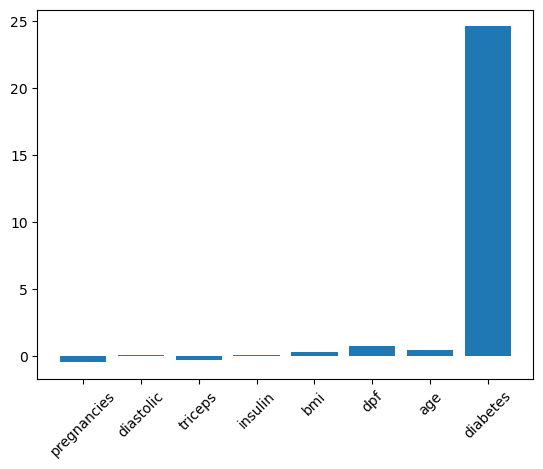

In [26]:
# Extraer los nombres de la columnas
names = diabetes_df.drop("glucose", axis = 1).columns

# Crear una instancia Lasso, estableciendo alpha en cero punto uno.
lasso = Lasso(alpha = 0.1)

# Ajustar el modelo a los datos y extraemos el coeficiente
lasso_coef = lasso.fit(X, y).coef_

# Trazar los coeficientes para cada caracteristica
plt.bar(names, lasso_coef)
plt.xticks(rotation = 45)
plt.show()

**Interpretación:** Podemos ver que el predictor más importante para nuestra variable objetivo es el nivel de glucosa, de si un individuo tiene diabetes o no. Esto nos permite comunicar a las personas que no son del ámbito técnico y para identificar los factores importantes para los predictores.

En **Conclusión** la regresión Ridge puede ser útil si queremos conservar todas las variables explicativas. Y la regresión Lasso si creemos que sólo queremos mantener un subconjunto de variables explicativas.

### Ajuste del modelo

Ahora, usaremos los técnicas enunciadas anteriormente pero a un conjunto de datos de Diabetes

In [27]:
# Dividir los datos en X e y. 
X = diabetes_df.drop("diabetes", axis = 1).values
y = diabetes_df["diabetes"].values

# Crear una instancia del clasificador. 
knn = KNeighborsClassifier(n_neighbors = 6)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.4,
                                                   random_state = 43)

# Ajustar los datos de entrenamiento
knn.fit(X_train,y_train)

# Predecir las etiquetas del conjunto de prueba 
y_pred = knn.predict(X_test)

# Imprimir la matriz de confusión
print(confusion_matrix(y_test,y_pred))

# Generar de las métricas relevantes
print(classification_report(y_test,y_pred))

[[181  24]
 [ 58  45]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       205
           1       0.65      0.44      0.52       103

    accuracy                           0.73       308
   macro avg       0.70      0.66      0.67       308
weighted avg       0.72      0.73      0.72       308



#### Interpretación

- **Clase 0 (personas sin diabetes)**:
    - **Precisión**: El modelo tiene una precisión del 76%, lo que significa que del total de personas que el modelo predijo que no tienen diabetes, el 76% realmente no la tiene.
    - **Recall**: El modelo tiene un recall del 88%, lo que significa que pudo identificar correctamente el 88% de las personas que realmente no tienen diabetes.
    - **F1-score**: El F1-score es una medida que combina precisión y recall en un solo número. Un F1-score del 82% indica que el modelo tiene un buen equilibrio entre precisión y recall para la clase de personas sin diabetes.
    - **Support**: El support es el número de ocurrencias reales de la clase en el conjunto de datos. En este caso, hay 205 personas que no tienen diabetes.

- **Clase 1 (personas con diabetes)**:
    - **Precisión**: El modelo tiene una precisión del 65%, lo que significa que del total de personas que el modelo predijo que tienen diabetes, el 65% realmente la tiene.
    - **Recall**: El modelo tiene un recall del 44%, lo que significa que pudo identificar correctamente solo el 44% de las personas que realmente tienen diabetes.
    - **F1-score**: Un F1-score del 52% indica que el modelo tiene un equilibrio relativamente bajo entre precisión y recall para la clase de personas con diabetes.
    - **Support**: Hay 103 personas que realmente tienen diabetes.

- **Accuracy**: La precisión total del modelo es del 73%, lo que significa que el modelo predijo correctamente el 73% de los casos, tanto de personas con diabetes como de personas sin diabetes.

- **Macro avg**: El promedio macro de precisión, recall y F1-score no tiene en cuenta el desequilibrio de clases y trata todas las clases por igual. La precisión macro avg es del 70%, el recall macro avg es del 66% y el F1-score macro avg es del 67%.

- **Weighted avg**: El promedio ponderado de precisión, recall y F1-score tiene en cuenta el desequilibrio de clases y da más peso a la clase con más instancias (en este caso, las personas sin diabetes). La precisión ponderada avg es del 72%, el recall ponderado avg es del 73% y el F1-score ponderado avg es del 72%.

Parece que el modelo no es lo suficientemente bueno para predecir si las personas tiene o no diabetes.

### Regresión logística y la curva de ROC

- La regresión logística se utiliza para ***clasificación***.
- Este modelo calcula la  probabilidad $p$, de que una observación pertenezca a una clases binaria.
- Usando este los datos de diabetes:
    - Si $p\geq 0.5$, etiquetamos los datos cómo $1$. Qué hace referencia a que una persona tiene más probabilidades de tener diabetes.
    - Si $p<0.5$, lo etiqutamos cómo $0$ para represetar que es más probable que no tenga diabetes.
 
*La regresión logista produce un límite de decisión lineal.*

In [28]:
# Instanciar regresión logística
logreg = LogisticRegression(max_iter = 1000)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 42)

# Ajustar el modelos a nuestros datos de entrenamiento
logreg.fit(X_train, y_train)

# Predecir en nuestro conjunto de prueba
y_pred_probs = logreg.predict_proba(X_test)[:,1]

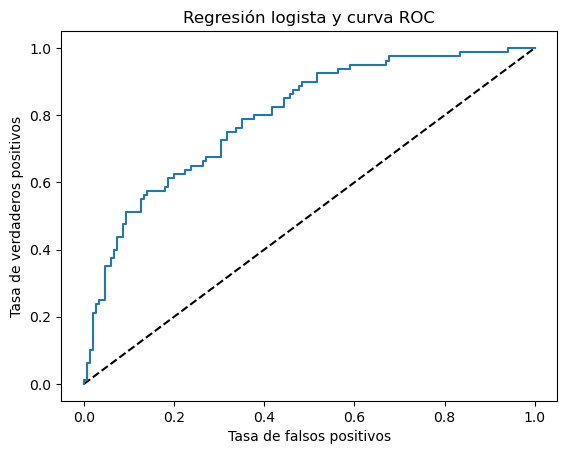

In [54]:
# Genera los valores para la curva ROC: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Trazamos una linea de puntos de cero a uno, junto con FPR y TPR
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Regresión logista y curva ROC')
plt.show()

Dado que la curva de ROC está por encíma de la línea de puntos, entonces el modelo funciona mejor que asignar valores aleatoriamente.

Ahora tratemos de calcular el área bajo la curva ROC junto con las demás métricas.

In [57]:
# Calculamos AUC
print(roc_auc_score(y_test, y_pred_probs))

0.7964403973509933


**Interpretación:** Un AUC de 0.7964 significa que tu modelo tiene una capacidad razonablemente buena para distinguir entre personas con diabetes y personas sin diabetes. En otras palabras, si eliges al azar a una persona con diabetes y a una persona sin diabetes de tu conjunto de datos, hay una probabilidad del 79.64% de que tu modelo clasifique correctamente a la persona con diabetes por encima de la persona sin diabetes.

### Ajustes de hiperparámetros

- Ahora que sabemos cómo evaluar el rendimiento del modelo, **exploremos cómo optimizarlos**
- Recordemos que tuvimos que elegir el valor para $\alpha$ en la regresión Ridge/Lasso antes de ajustarlo.
- Así mismo, antes de ajustar y predecir KNN, elegimos n_vecinos.
- Parámetros que especificamos antes de ajustar un modelo, como $\alpha$ o n-vecinos se denominan hiperparámetros.
- La idea es elegir un hiperparámetro óptimo.

Para elegir los hiperparámetros correctos debemos ajustarlos:

1. Probar valores diferentes y adaptarlos.
2. Ajustarlos todos separadamente.
3. Ver que tan bien funcionan
4. Elegir los mejores valores.

Para este proposito utilizamos la **validación cruzada** que ya vimos anteriormente.

Un enfoque para el ajuste de hiperparámetros se llama **búsqueda de cuadricula**, donde elegimos una cuadrícula de posibles valores de hiperparámetros para probar. Por ejemplo:

$$
\begin{array}{c|c|c|c}
    & 11 & 0.87 & 0.86 \\
    & 8 & 0.87 & 0.86 \\
    & 5 & 0.87 & 0.87 \\
    n_neighbors & 2 & 0.86 & 0.86 \\
    \hline
    && euclidiano & manhattan
\end{array}
$$

Realizamos una validación cruzada de k veces para cada combinación de hiperparámetros.

#### Ajuste de hiperparámetros con GridSearchCV

In [29]:
# Crear una instancia de KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Configurar la cuadrícula de parámetros
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Crear una instancia Lasso, estableciendo alpha en cero punto uno.
lasso = Lasso(alpha = 0.1)

# Instanciar lasso_cv
lasso_cv = RandomizedSearchCV(lasso, param_grid, cv = kf)

# Entrenar con los datos de entrenamiento
lasso_cv.fit(X_test, y_test)

# Imprimir
print("Parámetros lasso afinado: {}".format(lasso_cv.best_params_))
print("Puntuación de lazo afinado : {}".format(lasso_cv.best_score_))

Parámetros lasso afinado: {'alpha': 1e-05}
Puntuación de lazo afinado : 0.29057213593600484


#### Ajuste de hiperparámetros con RandomizedGridSearchCV

GridSearchCV, puede resultar caro desde el punto de vista computacional, especialmente si llevamos a cabo una búsqueda en un espacio de hiperparámetros grande. En este caso, puedes usar RandomizedSearchCV, que prueba un número fijo de configuraciones de hiperparámetros a partir de distribuciones de probabilidad especificadas.

In [30]:
# Crear el espacio de parámetros
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Crear una instancia del objeto RandomizedSearchCV
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Entrenar el modelo con los datos
logreg_cv.fit(X_train, y_train)

# Imprime los parámetros y la precisión
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.8571571428571428, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.9448979591836735}
Tuned Logistic Regression Best Accuracy Score: 0.7634129456559363


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver

Los parámetros que  ajustamos para tu modelo de Regresión Logística son los siguientes:

- **Tolerancia (tol)**: 0.8367510204081633. Este es el umbral para decidir cuándo parar la búsqueda de los parámetros óptimos. Un valor más alto significa que el modelo es menos sensible a los cambios en los datos y puede parar antes de encontrar los parámetros óptimos.

- **Penalización (penalty)**: 'l2'. Esto indica que estás utilizando la regularización L2, que penaliza los coeficientes grandes en el modelo para evitar el sobreajuste.

- **Peso de las clases (class_weight)**: 'balanced'. Esto significa que el modelo ajustará los pesos de las clases inversamente proporcional a las frecuencias de las clases. Esto es útil cuando tienes un conjunto de datos desequilibrado.

- **Parámetro de regularización C**: 0.2285714285714286. Este es el inverso de la fuerza de regularización. Un valor más pequeño especifica una regularización más fuerte, lo que significa que el modelo es más resistente al sobreajuste pero puede ser menos preciso en los datos de entrenamiento.

El mejor puntaje de precisión que obtuviste con estos parámetros es 0.7347826086956523. Esto significa que tu modelo, con estos parámetros, clasifica correctamente el 73.48% de los casos. En el contexto de la diabetes, esto podría significar que el modelo es capaz de identificar correctamente si un paciente tiene diabetes en el 73.48% de los casos, dado los datos de entrada.

Es importante recordar que la precisión no es la única métrica para evaluar un modelo, especialmente en el caso de conjuntos de datos desequilibrados. También podrías considerar otras métricas como la sensibilidad, la especificidad, el área bajo la curva ROC, entre otras. Además, siempre es útil comparar estos resultados con un modelo de referencia o baseline para entender mejor el rendimiento de tu modelo.